In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Load the dataset ---
# Make sure the path is correct for your project structure

df = pd.read_csv('../datasets/Mall_Customers.csv')
print("File loaded successfully.")


File loaded successfully.


In [11]:
# --- Step 2: Initial Inspection ---
# Look at the first few rows
print("\n--- First 5 Rows ---")
print(df.head())

# Get a technical summary (row count, column names, and check for missing values)
print("\n--- Data Info ---")
df.info()

# Get a statistical summary of the numerical columns
print("\n--- Statistical Summary ---")
print(df.describe())




--- First 5 Rows ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

--- Statistica

In [12]:
# --- Step 3: Clean up column names for easier use ---
df = df.rename(columns={
    'Annual Income (k$)': 'Annual_Income',
    'Spending Score (1-100)': 'Spending_Score'
})

print("\n--- Column names cleaned ---")
print(df.head())


--- Column names cleaned ---
   CustomerID  Gender  Age  Annual_Income  Spending_Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40


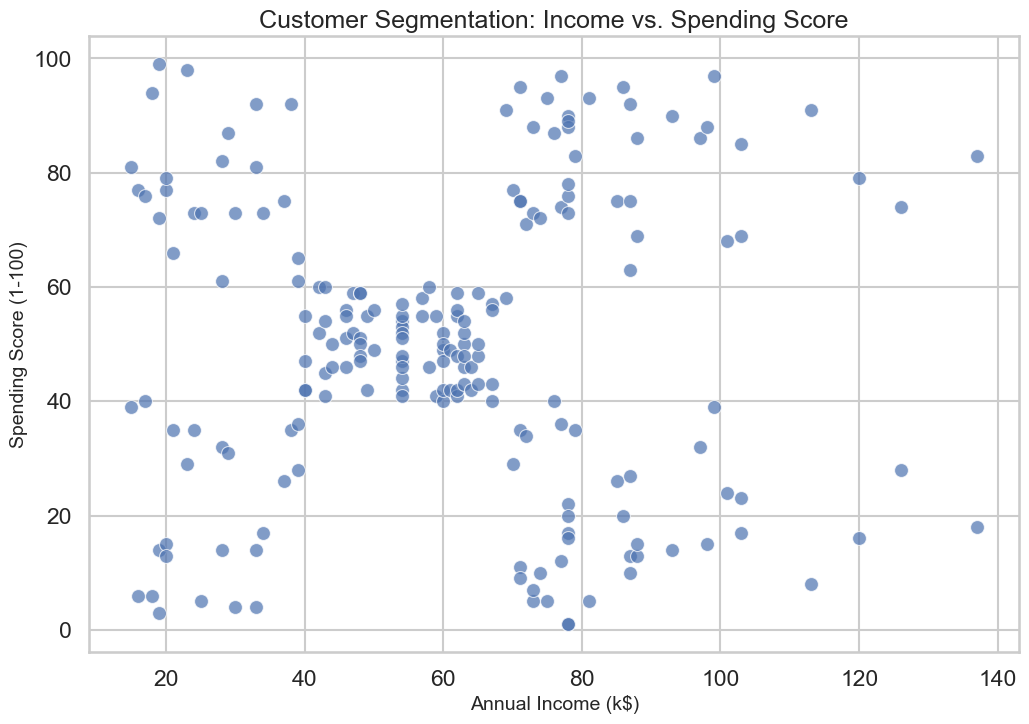

In [13]:
# Set a professional theme for the plot
sns.set_theme(style="whitegrid", context="talk")

# Create the figure for the plot
plt.figure(figsize=(12, 8))

# Generate the scatter plot
# We put Annual_Income on the x-axis and Spending_Score on the y-axis
sns.scatterplot(
    x='Annual_Income',
    y='Spending_Score',
    data=df, # Assuming 'df' is your DataFrame with the cleaned column names
    alpha=0.7, # Make points slightly transparent
    s=100 # Make points a bit larger
)

# Add clear titles and labels
plt.title('Customer Segmentation: Income vs. Spending Score', fontsize=18)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)

# Display the plot
plt.show()

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Prepare the data --- #
# We'll use the two features from our scatter plot
X_cluster = df[['Annual_Income', 'Spending_Score']]


In [15]:
# --- Step 2: Run the Elbow Method --- #
# We will store the inertia scores for each 'k' in this list
inertia_scores = []
k_values = range(1, 11) # We will test K from 1 to 10

print("Calculating inertia for K=1 through 10...")

for k in k_values:
    # Create a KMeans model for the current 'k'
    model = KMeans(
        n_clusters=k,
        init='k-means++', # A smart way to initialize the centroids
        n_init=10,      # Run the algorithm 10 times for each k to find the best result
        random_state=42
    )

    # Fit the model to our data
    model.fit(X_cluster)

    # Get the inertia (the total within-cluster sum of squares) and save it
    inertia_scores.append(model.inertia_)

print("Calculation complete.")



Calculating inertia for K=1 through 10...
Calculation complete.


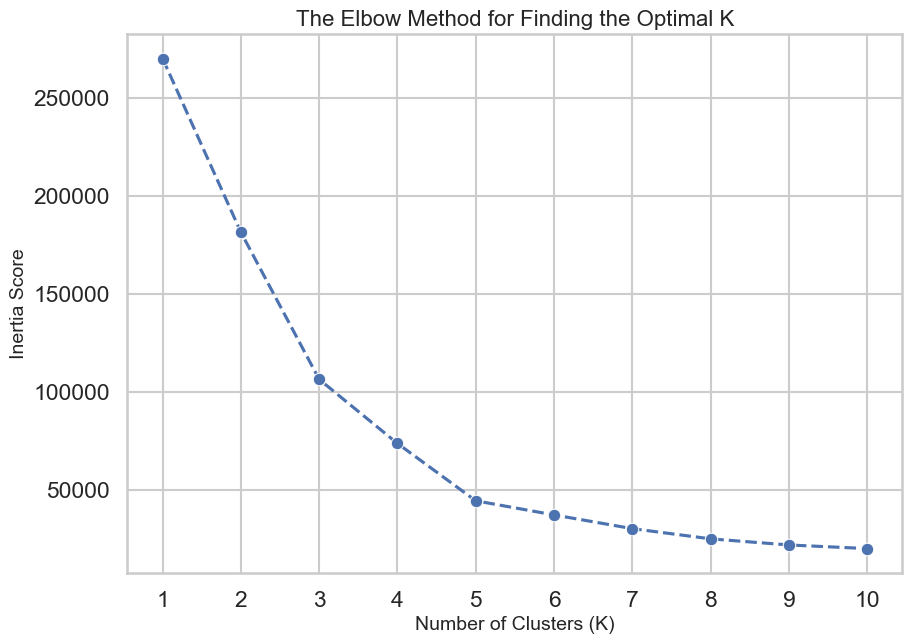

In [16]:
plt.show()# --- Step 3: Plot the Elbow Curve --- 3
plt.figure(figsize=(10, 7))
sns.lineplot(x=k_values, y=inertia_scores, marker='o', linestyle='--')

plt.title('The Elbow Method for Finding the Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('Inertia Score', fontsize=14)
plt.xticks(k_values)
plt.grid(True)


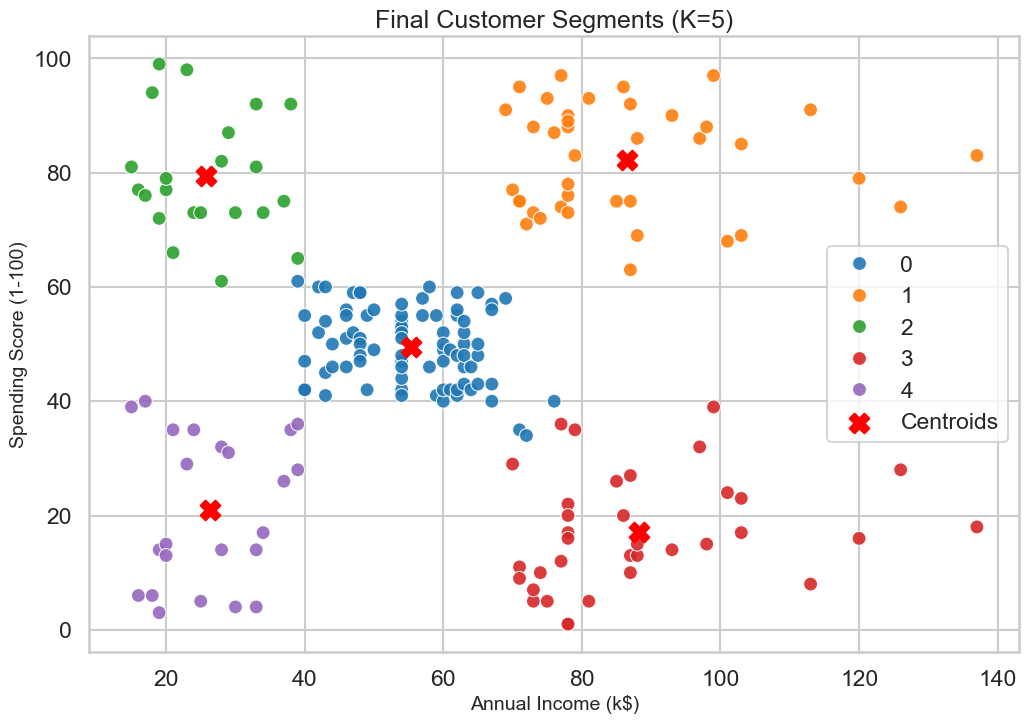

In [17]:
# --- Step 1: Run the Final K-Means Model --- #
# We now use our proven optimal K of 5.
final_model = KMeans(
    n_clusters=5,
    init='k-means++',
    n_init=10,
    random_state=42
)

# Fit the model and get the cluster predictions for each customer
# .fit_predict() trains the model and assigns each point to a cluster all in one step.
cluster_labels = final_model.fit_predict(X_cluster) # X_cluster is our ['Annual_Income', 'Spending_Score'] data

# Add these new labels back to our original DataFrame
df['Cluster'] = cluster_labels

# --- Step 2: Visualize the Final Clusters --- #
plt.figure(figsize=(12, 8))

# Create a scatter plot, but this time, color the points using our new 'Cluster' column.
# We use 'palette='tab10'' for a good set of distinct colors.
sns.scatterplot(
    x='Annual_Income',
    y='Spending_Score',
    hue='Cluster', # This is the magic part!
    data=df,
    palette='tab10',
    alpha=0.9,
    s=100
)

# We can also plot the "centroids" (the final center of each cluster)
centroids = final_model.cluster_centers_
plt.scatter(
    centroids[:, 0], # x-coordinates of centers
    centroids[:, 1], # y-coordinates of centers
    s=200,           # Make them larger
    c='red',         # Make them red
    marker='X',      # Use an 'X' marker
    label='Centroids'
)

plt.title('Final Customer Segments (K=5)', fontsize=18)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend()
plt.show()